<a href="https://colab.research.google.com/github/Siriluk11/05/blob/main/67130874_%E0%B8%A8%E0%B8%B4%E0%B8%A3%E0%B8%B4%E0%B8%A5%E0%B8%B1%E0%B8%81%E0%B8%A9%E0%B8%93%E0%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

train_dir = "/content/drive/MyDrive/archive/train"
test_dir  = "/content/drive/MyDrive/archive/test"


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32
)

Found 557 files belonging to 2 classes.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32
)

Found 140 files belonging to 2 classes.


In [5]:
class_names = train_ds.class_names
print("cats , dogs", class_names)

cats , dogs ['cats', 'dogs']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.5897 - loss: 0.9532 - val_accuracy: 0.7286 - val_loss: 0.5355
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8041 - loss: 0.4519 - val_accuracy: 0.8357 - val_loss: 0.3300
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8877 - loss: 0.3222 - val_accuracy: 0.9214 - val_loss: 0.2396
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8562 - loss: 0.3005 - val_accuracy: 0.9286 - val_loss: 0.1996
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9079 - loss: 0.2225 - val_accuracy: 0.9286 - val_loss: 0.1781
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9291 - loss: 0.1775 - val_accuracy: 0.9286 - val_loss: 0.1590
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9337 - loss: 0.1934 - val_accuracy: 0.9429 - val_loss: 0.1448
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9400 - loss: 0.1606 - val_accuracy: 0.9571 - val_loss

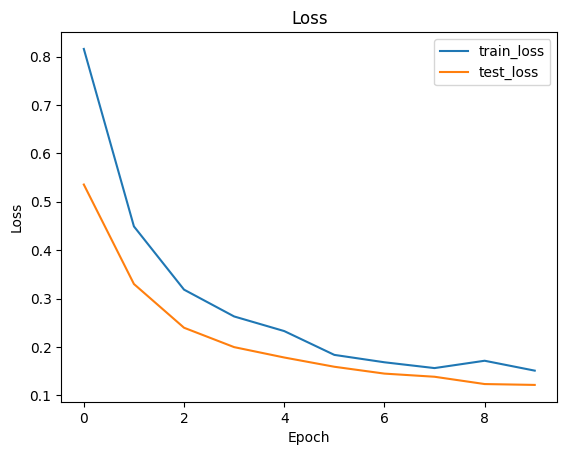

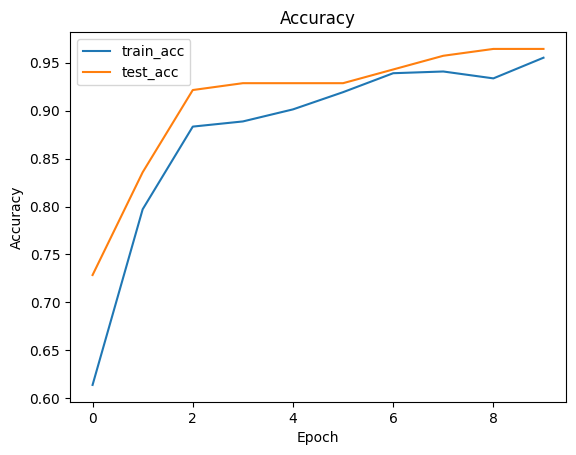

Test Loss: 0.1215
Test Accuracy: 0.9643


In [13]:
import matplotlib.pyplot as plt



# ===== 2) Plot กราฟ Loss =====
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ===== 3) Plot กราฟ Accuracy =====
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='test_acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ===== 4) Evaluate บน test set (val_ds) =====
test_loss, test_acc = model.evaluate(val_ds, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


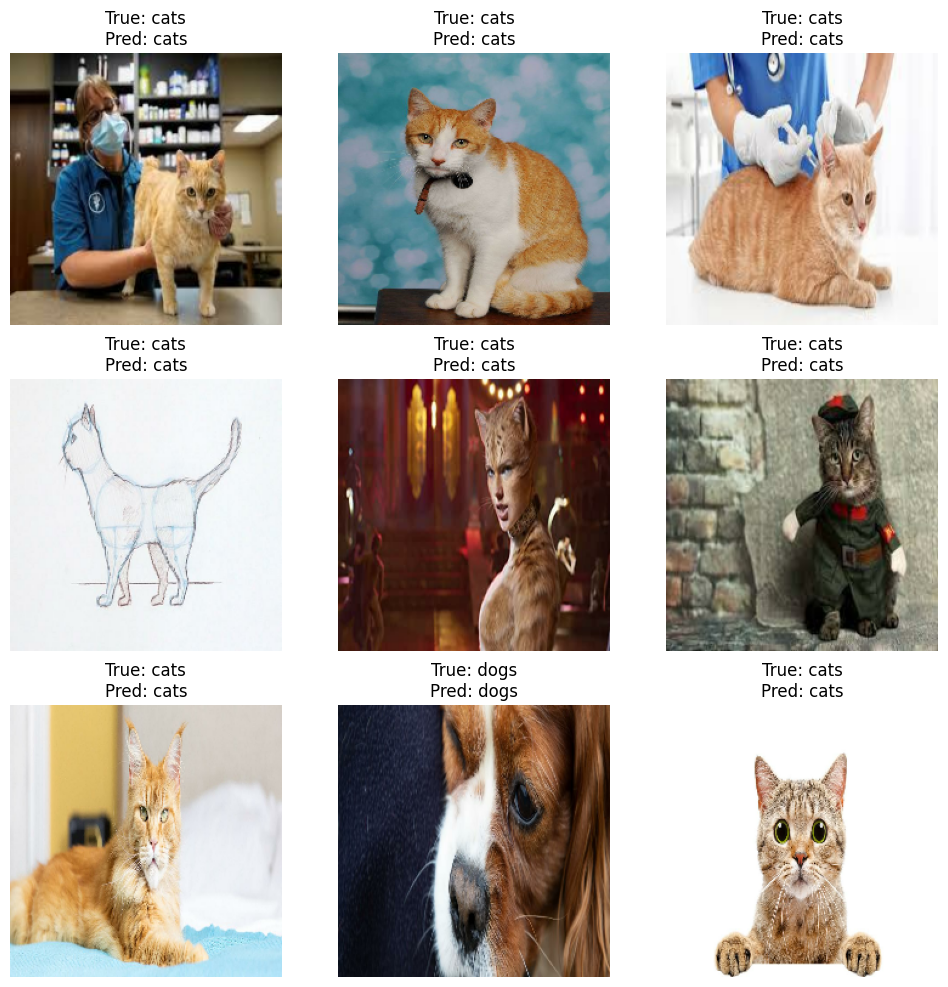

In [14]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    predicted_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
        plt.axis("off")
    break